## Train-Test Split From Scratch

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3


In [3]:
def train_test_split(X, y, test_size=0.3):
    """
    Takes in features and labels and returns X_train, X_test, y_train, and y_test
    ----
    In: X (features), y (labels), test_size (percentage of data to go into test)
    Out: X_train, X_test, y_train, and y_test
    """
    X = np.array(X)
    y = np.array(y)
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    splitter = np.random.choice([0,1],size=y.shape,p=[1-test_size,test_size])
    for x,y,z in zip(X,y,splitter):
        if z == 0:
            X_train.append(x)
            y_train.append(y)
        else:
            X_test.append(x)
            y_test.append(y)
    return X_train, X_test, y_train, y_test

In [4]:
from sklearn.datasets import load_boston
X = load_boston().data
y = load_boston().target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
len(X_test)/(len(X_train)+len(X_test))

0.18774703557312253

In [7]:
def plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=0,title="Checking Train-Test Split"):
    x_plot = []
    x_plot_test = []
    for j in X_train:
        x_plot.append(j[feature_num])
    for j in X_test:
        x_plot_test.append(j[feature_num])

    plt.figure(figsize=(8,6))
    plt.scatter(x_plot, y_train, c='b')
    plt.scatter(x_plot_test, y_test, c='r')
    plt.xlabel("Feature " + str(feature_num))
    plt.ylabel("Y");
    plt.title(title);

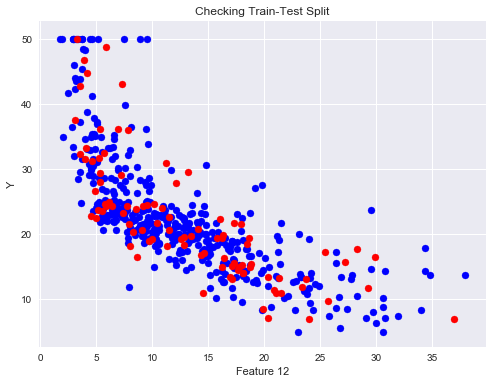

In [8]:
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=12)

# Cross Validation from Scratch

In [9]:
class cross_val:
    
    def __init__(self, show_plot=False, feat_num=0):
        """
        The Cross-Val object contains several objects that the user may want to 
        use later, including a final copy of the best model.
        ---
        Params:
        show_plot: should it plot the data showing the splits
        feat_num: if show_plot, which feature should be used (by column num)
        best_model: the model with the lowest MSE is kept for later usage
        """
        self.show_plot = show_plot
        self.feat_num = feat_num
        self.best_model = None
        self.best_model_score = None
        
    def plot_single_feature_vs_label(self, X_train, X_test, y_train, y_test, feature_num=0, 
                                     title="Checking Train-Test Split"):
        """
        This helper method is to make plots of the data being split 
        with one feature vs the target label, showing each fold for 
        visual inspection of the splits. 
        """
        x_plot = []
        x_plot_test = []
        for j in X_train:
            x_plot.append(j[feature_num])
        for j in X_test:
            x_plot_test.append(j[feature_num])

        plt.figure(figsize=(8,6))
        plt.scatter(x_plot, y_train, c='b')
        plt.scatter(x_plot_test, y_test, c='r')
        plt.xlabel("Feature " + str(feature_num))
        plt.ylabel("Y");
        plt.title(title);

    def plot_coefs(self):
        """
        This method shows the coefficient values for each fold in a plot.
        If there are 10 coefficient, there will be 10 plots. If there were 3
        folds, each plot will contain 3 points.
        """
        if not self.coefs:
            print("Either your model doesn't have coefficients, or you")
            print("must run cross_validation_scores first!")
            return            
        for coef in range(len(self.coefs[0])):
            plot_x = []
            plot_y = []
            i=1
            for fold in self.coefs:
                plot_x.append(i)
                plot_y.append(fold[coef])
                i+=1
            plt.figure(figsize=(10,8))
            plt.plot(plot_x,plot_y)
            plt.plot(plot_x,[np.mean(plot_y)]*len(plot_x),'r--')
            plt.ylabel("coef "+str(coef))
            plt.xlabel("Fold ID")
            plt.xticks([x for x in range(1,FOLDS+1)])
            plt.title("Variation of Coefficient Across Folds")
        
    def cross_validation_scores(self, model, X, y, k=5, random_seed=42):
        """
        Splits the dataset into k folds by randomly assigning each row a
        fold ID. Afterwards, k different models are built with each fold being
        left out once and used for testing the model performance.
        ---
        Inputs:
        model: must be a class object with fit/predict methods. 
        X: feature matrix (array)
        y: labels (array)
        k: number of folds to create and use
        random_seed: sets the random number generator seed for reproducibility
        """
        X = np.array(X)
        y = np.array(y)
        self.score_folds = []
        coefs = []
        fold_nums = [x for x in range(k)]
        np.random.seed(random_seed)
        splitter = np.random.choice(fold_nums,size=y.shape)
        best_score = None
        for fold in fold_nums:
            X_train = []
            X_test = []
            y_train = []
            y_test = []
            for x2,y2,z2 in zip(X,y,splitter):
                if z2 == fold:
                    X_test.append(x2)
                    y_test.append(y2)
                else:
                    X_train.append(x2)
                    y_train.append(y2)
            model.fit(X_train,y_train)
            current_score = model.score(X_test, y_test)
            self.score_folds.append(current_score)
            if not best_score or current_score > best_score:
                best_score = current_score
                self.best_model = model
                self.best_model_score = current_score
            if model.coef_.any():
                coefs.append(model.coef_)
            if self.show_plot:
                plot_title = "CV Fold " + str(fold)
                plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=self.feat_num, 
                                             title=plot_title)
        if coefs:
            self.coefs = coefs     
        
    def print_report(self):
        """
        After the CV has been run, this method will print some summary statistics
        as well as the coefficients from the model.
        """
        print("Mean Score: ", np.mean(self.score_folds))
        print("Score by fold: ", self.score_folds)
        if self.coefs:
            print("Coefs (by fold): ")
            for i,c in enumerate(self.coefs):
                print("Fold ",i,": ",c)

In [10]:
from sklearn.datasets import load_boston
X = load_boston().data
y = load_boston().target

In [11]:
import sys 
sys.path.append('../modules')
from OLS import OLS
cv = cross_val()
FOLDS = 10
cv.cross_validation_scores(OLS(w_intercept=True), X, y, k=FOLDS)

In [12]:
cv.coefs

[array([[ -8.49863747e-02],
        [  4.67969563e-02],
        [  3.21537023e-02],
        [  2.79633289e+00],
        [ -1.95197814e+01],
        [  4.06373426e+00],
        [  5.09006670e-03],
        [ -1.47142554e+00],
        [  3.16981701e-01],
        [ -1.26860625e-02],
        [ -9.86429106e-01],
        [  1.11365386e-02],
        [ -5.10744690e-01],
        [  3.52550965e+01]]), array([[ -1.14425945e-01],
        [  4.91871431e-02],
        [  3.16671496e-02],
        [  2.68846284e+00],
        [ -1.87397352e+01],
        [  3.69574646e+00],
        [ -4.11247193e-04],
        [ -1.56249147e+00],
        [  3.23032983e-01],
        [ -1.24693497e-02],
        [ -9.98132092e-01],
        [  9.61030679e-03],
        [ -5.26165545e-01],
        [  3.86726899e+01]]), array([[ -1.08831682e-01],
        [  3.82658045e-02],
        [  1.06421707e-02],
        [  2.60679571e+00],
        [ -1.73220484e+01],
        [  3.74665932e+00],
        [  8.61473917e-04],
        [ -1.38134

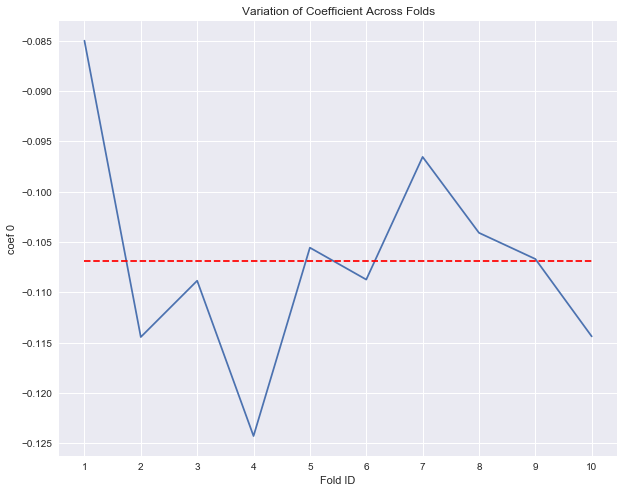

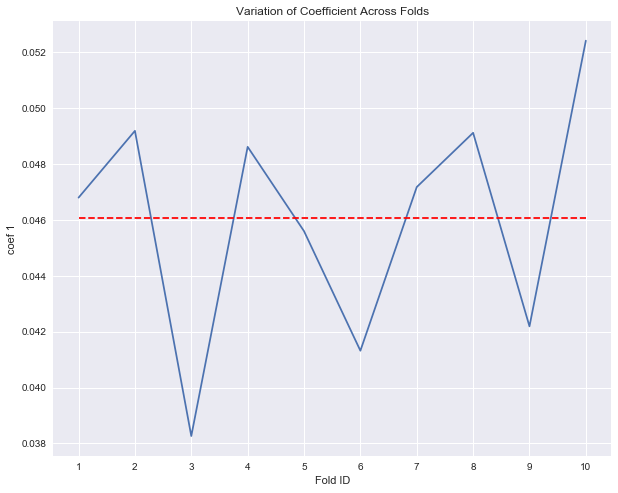

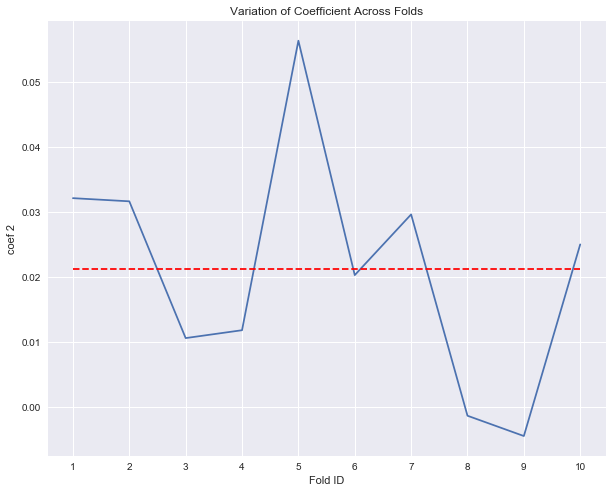

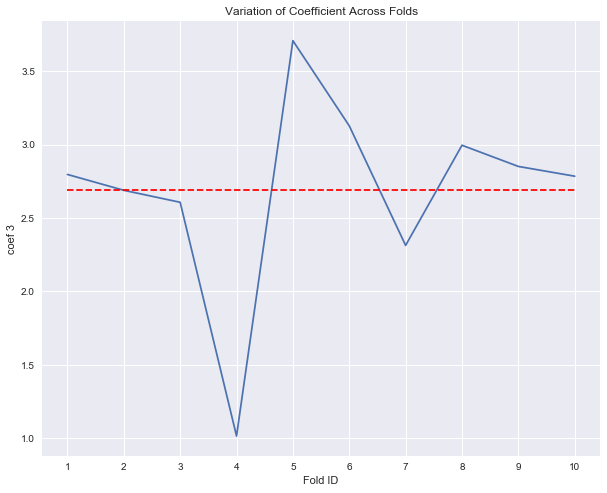

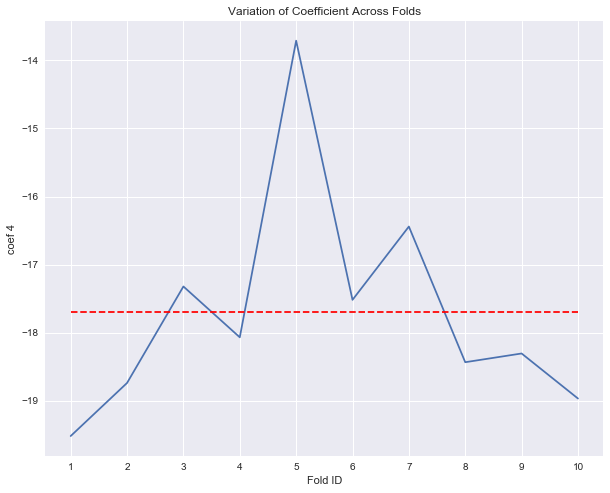

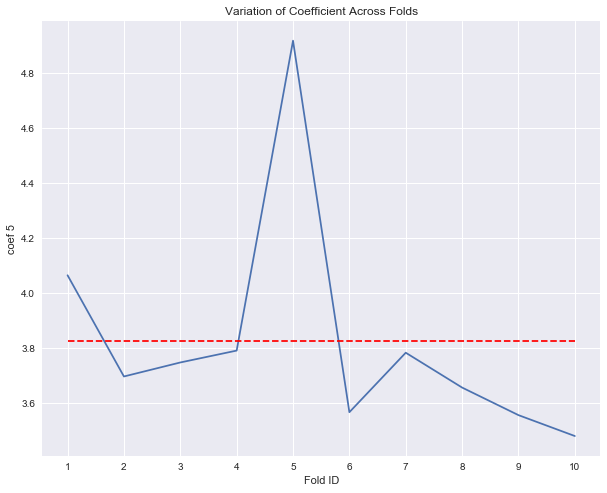

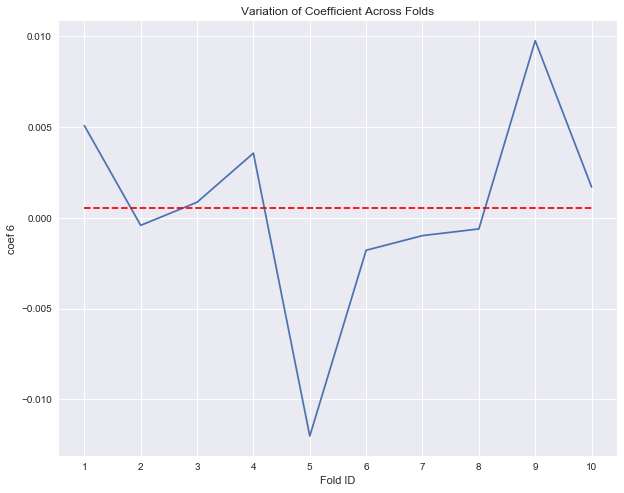

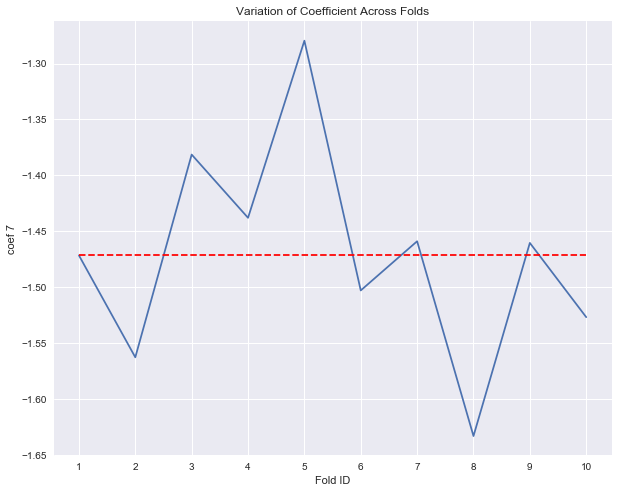

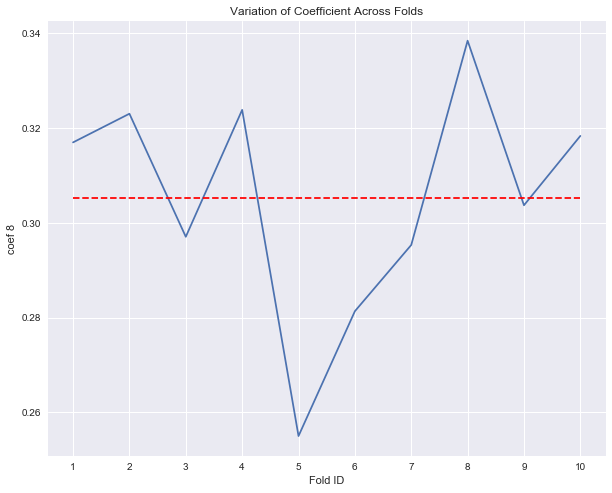

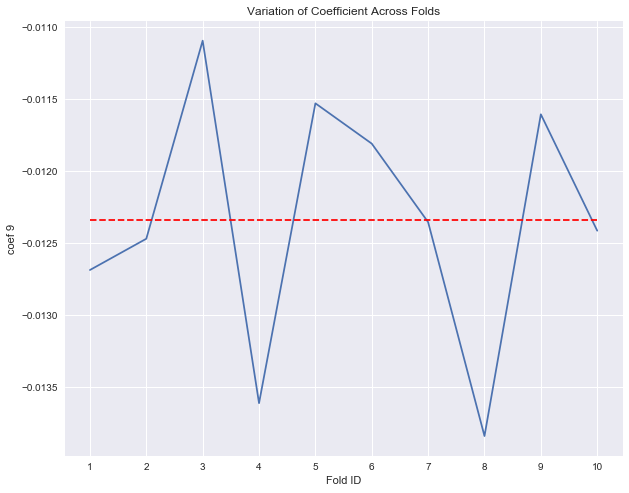

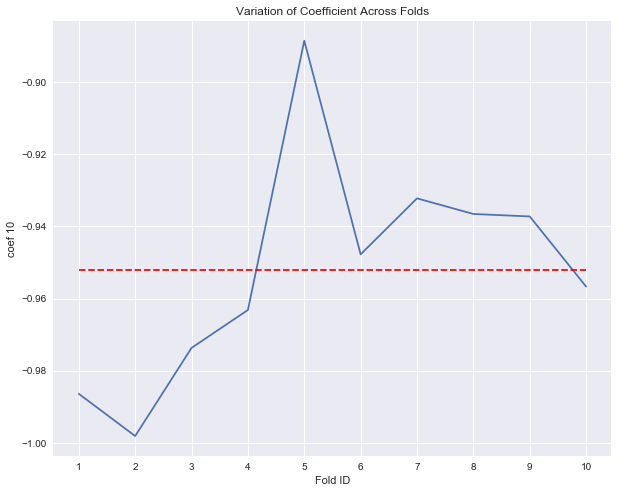

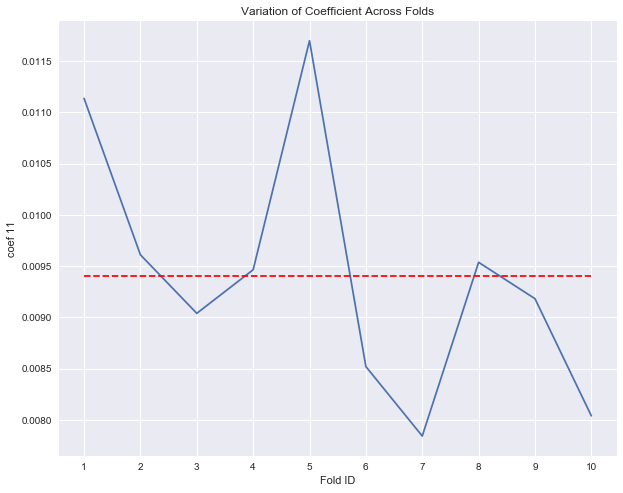

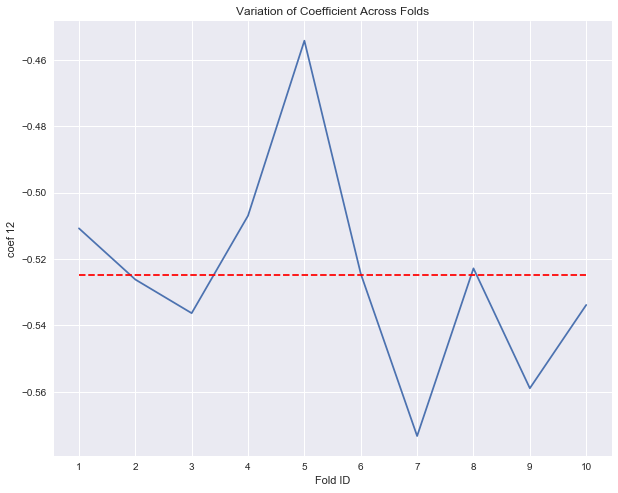

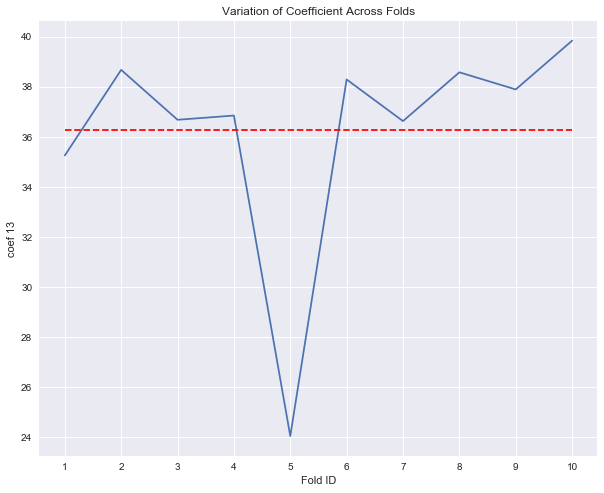

In [13]:
cv.plot_coefs()

In [14]:
cv.print_report()

Mean Score:  -117.407006142
Score by fold:  [-82.436260029560344, -68.023353620714417, -86.23200994376964, -101.8357569039774, -141.93027022284926, -160.96615617835147, -153.16744915668068, -133.94649037320312, -144.83384666525771, -100.6984683280504]
Coefs (by fold): 
Fold  0 :  [[ -8.49863747e-02]
 [  4.67969563e-02]
 [  3.21537023e-02]
 [  2.79633289e+00]
 [ -1.95197814e+01]
 [  4.06373426e+00]
 [  5.09006670e-03]
 [ -1.47142554e+00]
 [  3.16981701e-01]
 [ -1.26860625e-02]
 [ -9.86429106e-01]
 [  1.11365386e-02]
 [ -5.10744690e-01]
 [  3.52550965e+01]]
Fold  1 :  [[ -1.14425945e-01]
 [  4.91871431e-02]
 [  3.16671496e-02]
 [  2.68846284e+00]
 [ -1.87397352e+01]
 [  3.69574646e+00]
 [ -4.11247193e-04]
 [ -1.56249147e+00]
 [  3.23032983e-01]
 [ -1.24693497e-02]
 [ -9.98132092e-01]
 [  9.61030679e-03]
 [ -5.26165545e-01]
 [  3.86726899e+01]]
Fold  2 :  [[ -1.08831682e-01]
 [  3.82658045e-02]
 [  1.06421707e-02]
 [  2.60679571e+00]
 [ -1.73220484e+01]
 [  3.74665932e+00]
 [  8.61473917e

In [15]:
cv.best_model.predict(X[0].reshape(-1,13))

29.91417708165055

In [16]:
print(cv.best_model)
print(cv.best_model_score)

-68.0233536207


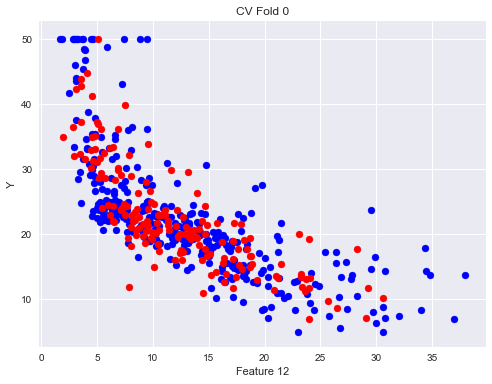

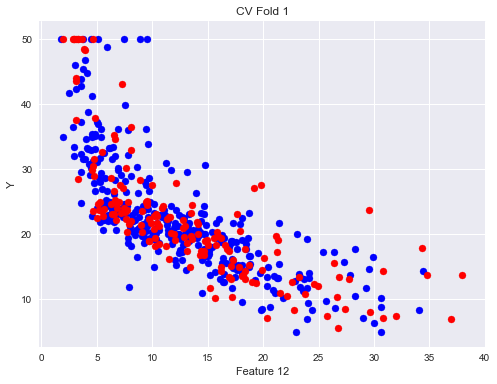

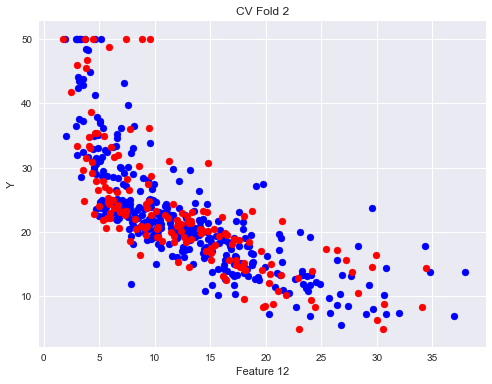

In [17]:
cv = cross_val(show_plot=True, feat_num=12)
cv.cross_validation_scores(OLS(), X, y, k=3)